In [39]:
import numpy as np
from matplotlib import pyplot as plt
from Plasma import Plasma_Evolver
import pandas as pd
from scipy import stats
import itertools

In [143]:
dts = np.logspace(-2, -11, 10, base=2)
N = 128
tmax = 4

euler_plasmas = []

for dt in dts:
    euler_model = Plasma_Evolver(N, dt, epsilon_in=0.05, delta_in=0, insertion=False, rk = False)
    euler_model.evolve_plasma(tmax)
    euler_plasmas.append(euler_model)
    


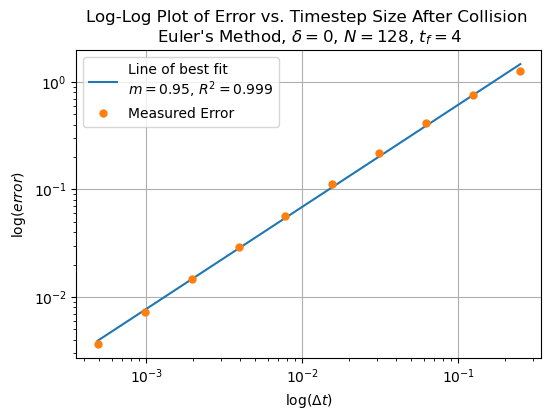

In [144]:
final_diff = []

for plasma in euler_plasmas:
    total_energy = np.array(plasma.Ep_hist) + np.array(plasma.Ek_hist)
    energy_diff = np.abs(total_energy - total_energy[0])
    final_diff.append(energy_diff[-1])

final_diff = np.array(final_diff)
log_final_diff = np.log(final_diff)
d_log_final_diff = np.diff(log_final_diff)

log_dts = np.log(dts)
d_log_dts = np.diff(np.log(dts))

linreg = stats.linregress(log_dts, log_final_diff)

conv_rate = d_log_final_diff / d_log_dts



fig, axs = plt.subplots(1, 1, figsize=(6, 4))

axs.set_title("Log-Log Plot of Error vs. Timestep Size After Collision \nEuler's Method, $\delta = {}$, $N = {}$, $t_f = {}$".format(
    0, N, tmax 
))
axs.grid()
axs.set_xlabel(r"$\log(\Delta t)$")
axs.set_ylabel(r"$\log(error)$")
axs.loglog(dts, np.exp(linreg.intercept) * (dts ** linreg.slope),
           label="Line of best fit \n$m = {}$, $R^2 = {}$".format(
               round(linreg.slope,3), round(linreg.rvalue**2,3)
           ))
axs.loglog(dts, final_diff, marker=".", markersize="10", linewidth=0, base=10,
           label="Measured Error")
axs.legend()
plt.savefig("Results/OrderAnalysis/Euler_noreg_error_after.png")




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


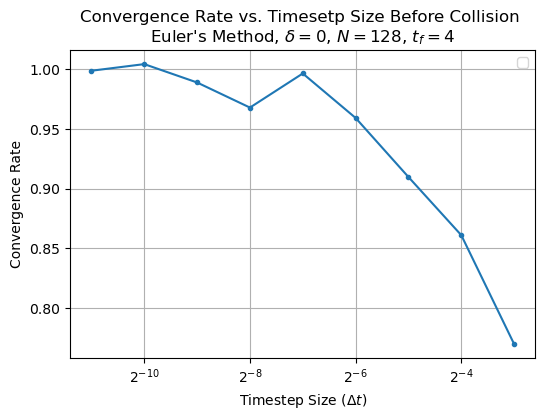

In [145]:
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

axs.set_title("Convergence Rate vs. Timesetp Size Before Collision \nEuler's Method, $\delta = {}$, $N = {}$, $t_f = {}$".format(
    0, N, tmax 
))
axs.grid()
axs.set_xlabel(r"Timestep Size ($\Delta t$)")
axs.set_ylabel(r"Convergence Rate")
axs.semilogx(dts[1:], conv_rate, base=2, marker=".")
axs.legend()

plt.savefig("Results/OrderAnalysis/Euler_noreg_convrate_after.png")

In [146]:
data = np.array([dts, final_diff, final_diff / dts, np.insert(conv_rate, 0, 0)]).T
df = pd.DataFrame(data, columns=['dt', 'error', 'error / dt', "convergence rate"])
print(df)
df.to_csv('Results/OrderAnalysis/Euler_noreg_after.csv', index=False)

         dt     error  error / dt  convergence rate
0  0.250000  1.278729    5.114914          0.000000
1  0.125000  0.749987    5.999896          0.769773
2  0.062500  0.412901    6.606411          0.861071
3  0.031250  0.219766    7.032500          0.909829
4  0.015625  0.113023    7.233486          0.959347
5  0.007812  0.056644    7.250434          0.996624
6  0.003906  0.028957    7.412869          0.968035
7  0.001953  0.014588    7.469283          0.989062
8  0.000977  0.007272    7.446227          1.004460
9  0.000488  0.003639    7.451838          0.998913
